In [53]:
# Import the necessary packages
import face_recognition
import argparse
import pickle
import cv2
import urllib.request

In [54]:
print("Enter Image URL: ")
url = str(input())
#https://data.whicdn.com/images/305367576/large.jpg
#https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-3anfqgkl781ajqmbkvi8q3dcs4-20171004130213.Medi.jpeg

Enter Image URL: 
https://ksassets.timeincuk.net/wp/uploads/sites/55/2013/05/BenedictCumberbatchPA170611.jpg


In [55]:
try:
    urllib.request.urlretrieve(url, "temp/local-filename.jpg")
except urllib.request.HTTPError:
    print("HTTP Error 403: Forbidden")
    print("Try a different link")
    sys.exit()

In [56]:
args = {'encodings': 'encodings_international_celebrity.pickle',
        'image': 'temp/local-filename.jpg',
        'detection_method': 'hog'}

In [57]:
print("[INFO] loading encodings...")
data = pickle.loads(open(args["encodings"], "rb").read())

[INFO] loading encodings...


In [58]:
image = cv2.imread(args["image"])
#image = cv2.resize(image,(480,720))
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [59]:
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb, model=args["detection_method"])
encodings = face_recognition.face_encodings(rgb, boxes)

[INFO] recognizing faces...


In [60]:
print(boxes)

[(134, 491, 455, 170)]


In [61]:
names = []

In [62]:
for encoding in encodings:
    # attempt to match each face in the input image to our known encodings
    matches = face_recognition.compare_faces(data["encodings"], encoding, tolerance=0.6)
    name = "Unknown"

    # check to see if we have found a match
    if True in matches:
        # find the indexes of all matched faces then initialize a 
        # dictionary to count the total number of times each face was matched
        
        matchedIdxs = [i for (i, b) in enumerate(matches) if b ]
        counts = {}

        # loop over the matched indexes and maintain a count for
        # each recognized face face
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1

        # determine the recognized face with the largest number of
        # votes (note: in the event of an unlikely tie Python will
        # select first entry in the dictionary)
        name = max(counts, key=counts.get)

    # update the list of names
    names.append(name)
print(names)

['Benedict Cumberbatch']


In [63]:
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
    # draw the predicted face name on the image
    cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 255), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
        0.6, (255, 255, 255), 2)

# show the output image
#cv2.resize(image,(400,400))
#cv2.imshow("Image", image)  
#cv2.waitKey(0) 

Populating the interactive namespace from numpy and matplotlib


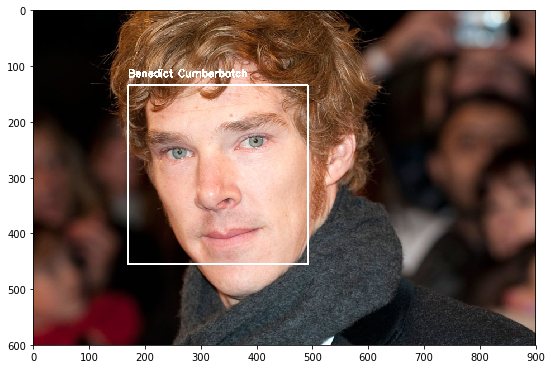

In [64]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,16))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(image)
plt.show()

In [65]:
import os
os.remove(args["image"])